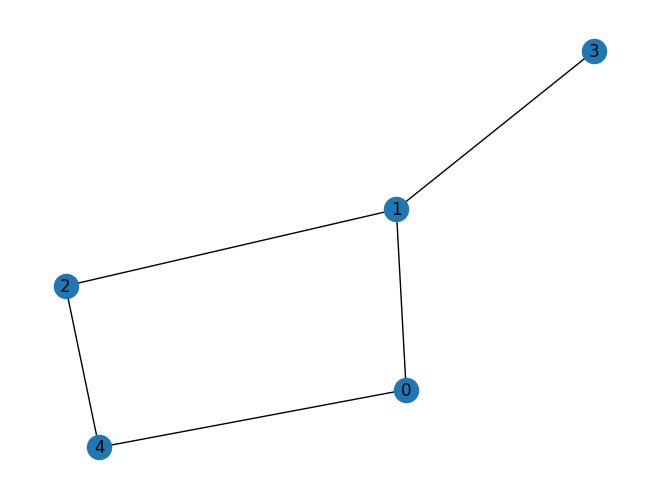

In [245]:
#importing the networkx library
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

n = 5
G= nx.erdos_renyi_graph(n,0.5)
nx.draw(G, with_labels=True)


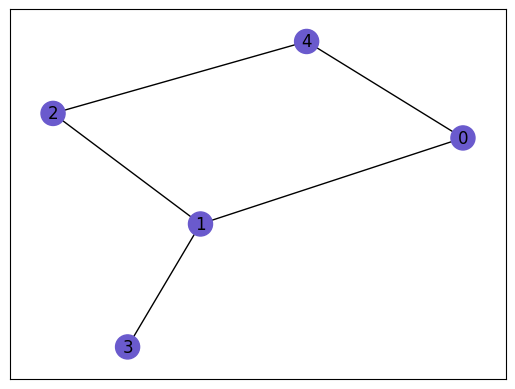

In [246]:
pos = nx.spring_layout(G)
for (u, v) in G.edges():
    G[u][v]['weight'] = random.uniform(1.0, 1.0)
colors = ["slateblue" for node in G.nodes()]

def f(G,colors,pos):
    nx.draw_networkx(G,node_color=colors,pos=pos)
    #edge_labels=nx.get_edge_attributes(G,"weight")
    #nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=edge_labels)
f(G,colors,pos)

In [247]:
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i][j] = temp["weight"]
print(w)

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]]


case = [0, 0, 0, 0, 0] cut value = 0.0
case = [1, 0, 0, 0, 0] cut value = 2.0
case = [0, 1, 0, 0, 0] cut value = 3.0
case = [1, 1, 0, 0, 0] cut value = 3.0
case = [0, 0, 1, 0, 0] cut value = 2.0
case = [1, 0, 1, 0, 0] cut value = 4.0
case = [0, 1, 1, 0, 0] cut value = 3.0
case = [1, 1, 1, 0, 0] cut value = 3.0
case = [0, 0, 0, 1, 0] cut value = 1.0
case = [1, 0, 0, 1, 0] cut value = 3.0
case = [0, 1, 0, 1, 0] cut value = 2.0
case = [1, 1, 0, 1, 0] cut value = 2.0
case = [0, 0, 1, 1, 0] cut value = 3.0
case = [1, 0, 1, 1, 0] cut value = 5.0
case = [0, 1, 1, 1, 0] cut value = 2.0
case = [1, 1, 1, 1, 0] cut value = 2.0
case = [0, 0, 0, 0, 1] cut value = 2.0
case = [1, 0, 0, 0, 1] cut value = 2.0
case = [0, 1, 0, 0, 1] cut value = 5.0
case = [1, 1, 0, 0, 1] cut value = 3.0
case = [0, 0, 1, 0, 1] cut value = 2.0
case = [1, 0, 1, 0, 1] cut value = 2.0
case = [0, 1, 1, 0, 1] cut value = 3.0
case = [1, 1, 1, 0, 1] cut value = 1.0
case = [0, 0, 0, 1, 1] cut value = 3.0
case = [1, 0, 0, 1, 1] cu

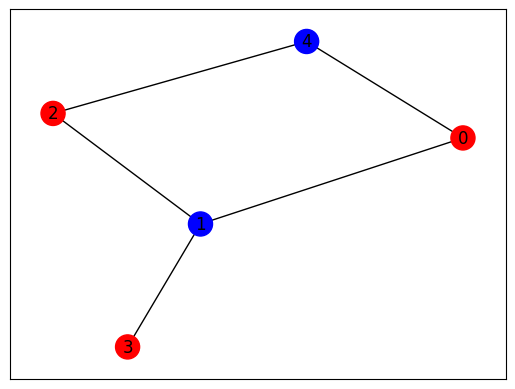

In [248]:
sol = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    Cut_value = 0
    for i in range(n):
        for j in range(n):
            Cut_value += w[i][j]*x[i]*(1-x[j])
    if sol < Cut_value:
        sol = Cut_value
        xlist = x
    print("case = " +str(x)+ " cut value = " +str(Cut_value))
colors = ["b" if xlist[i] == 0 else "r" for i in range(n)]
f(G,colors,pos)
print("best solution = " +str(xlist)+ " cut value = " +str(sol))